# Script "CAS AI 2021"


## Gradient Descent


<img src="https://drive.google.com/uc?export=view&id=1aYrpCcCfOplKadHCfyACXWLlJrEKzVOz" width="400">

### What is a Gradient at all?
Definition

Source: https://en.wikipedia.org/wiki/Gradient?action=edit

In vector calculus, the gradient of a scalar-valued differentiable function $f$ of several variables is the vector field (or vector-valued function) 
$\nabla f$
 whose value at a point 
$\displaystyle p$
 is the vector whose components are the partial derivatives of 
$\displaystyle f$
 at 
$\displaystyle p$
. That is, for 
$\displaystyle f\colon \mathbf {R} ^{n}\to \mathbf {R} $
, its gradient 
$\displaystyle \nabla f\colon \mathbf {R} ^{n}\to \mathbf {R} ^{n}$
 is defined at the point 
$\displaystyle \mathrm {p} =(x_{1},\ldots ,x_{n})$
 in n-dimensional space as the vector:

$\displaystyle \nabla f(p)={\begin{bmatrix}{\frac {\partial f}{\partial x_{1}}}(p)\\\vdots \\{\frac {\partial f}{\partial x_{n}}}(p)\end{bmatrix}}.$

The nabla symbol 
$\displaystyle \nabla $
, written as an upside-down triangle and pronounced "del", denotes the vector differential operator.

### And in simple Words?
The gardient of a function $f$ at a point $p$ is the value of partial derivatives of this function at this point.
Well, the best thing is, as always, to show it on a toy example.
Supposed we have a function $z(x_i,y_i) = \displaystyle  \sum_{i=1}^{n} 2x_i^2 + 3y_i^2, n = 2$

#### Pay Attention 1
We compute the symbolic derivatives under assumption that the variables are continous: $x, y \in \mathbf{R}$. Hence the summation symbol $\sum_{i=0}^{n}$ has no impact on (partial) derivatives. This is a discrete operation which can be applied on the finite number of values, in our case - 2, **after** gradients are computed. The result of this operation is simply the sum of the gradient vector's elements. The number of this elements corresponds to the number of data points for which we compute gradients. And this is exactly what we want - the gradient value for every point and not their sum.

For the sake of completeness, here is the general rule for derivatives of summation operators:

$f(x) = \displaystyle \sum g(x) \Rightarrow
{\cfrac {d}{dx}}f = \displaystyle \sum {\cfrac {d}{dx}}g$

In words: The derivative of the sum is equal the sum of derivatives.

#### Pay Attention 2
In case you see any constant factor before the summation symbol it will have inpact on (partial) derivatives since it can be interpreted as symbolic continuos factor:

$z(x_i,y_i) = \cfrac{1}{n}\displaystyle \sum_{i=1}^{n} 2x_i^2 + 3y_i^2, n = 2$

can be wiritten as

$z(x_i,y_i) = \displaystyle \sum_{i=1}^{n} \cfrac{1}{2}(2x_i^2 + 3y_i^2)$ 

In this case you would treat $\cfrac{1}{n} \rightarrow \cfrac{1}{2}$ as a factor when you compute derivatives.


Nothing special yet, right? 

Now we are going to build partial derivatives of this function

$z(x,y) = 2x^2 + 3y^2$ (as mentioned above - we ignore the summation operator):


$\displaystyle \nabla z(p)={\begin{bmatrix}{\cfrac {\partial z}{\partial x}}(p)\\{\cfrac {\partial z}{\partial y}}(p)\end{bmatrix}}=
{\begin{bmatrix}{4x}(p)\\{6y}(p)\end{bmatrix}}$

But wait, what is about $\mathbf p$?

We haven't defined it yet!
$p = (x, z)$
$p$ is actually a list of **points** of the two, like we see here, or generally $n-dimensional$ function given by the values of its indipendend variables.

**Example**

Supposed we have the following values of $x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $ and $y = \begin{bmatrix} 3 \\ 4 \end{bmatrix} $

So, what are the points $\mathbf p$ to be plugged in to the partial derivatives computed above?

Here we have only two points:

$p_1=(x=1,y=3)$ and $p_2 = (x=2,y=4)$

Now let's plug it:

$\displaystyle \nabla z(p)={\begin{bmatrix}{\cfrac {\partial z}{\partial x}}(p)\\{\cfrac {\partial z}{\partial y}}(p)\end{bmatrix}}=
{\begin{bmatrix}{4x}(p)\\ {6y}(p)\end{bmatrix}}\\
\nabla x(p)={\begin{bmatrix}{4x}(x=1,y=3)\\ {4x}(x=2,y=4)\end{bmatrix}}\\\nabla y(p)={\begin{bmatrix}{6y}(x=1,y=3)\\ {6y}(x=2,y=4)\end{bmatrix}}\\\nabla x(p)={\begin{bmatrix}{4}\\ {8}\end{bmatrix}}\\
\nabla y(p)={\begin{bmatrix}{18}\\ {24}\end{bmatrix}}$


### Let's now compute the same gradients with PyTorch

In [1]:
import torch
x = torch.tensor([1.0,2.0], requires_grad=True)
y = torch.tensor([3.0,4.0], requires_grad=True)
print(x, y)

tensor([1., 2.], requires_grad=True) tensor([3., 4.], requires_grad=True)


In [2]:
z = 2*x**2 + 3*y**2

In [3]:
z = torch.sum(z)

In [4]:
z

tensor(85., grad_fn=<SumBackward0>)

In [5]:
z.backward()

In [6]:
x.grad, y.grad

(tensor([4., 8.]), tensor([18., 24.]))

### Now the same for **mean**

In [7]:
import torch
x = torch.tensor([1.0,2.0], requires_grad=True)
y = torch.tensor([3.0,4.0], requires_grad=True)

z = 2*x**2 + 3*y**2
z = torch.mean(z)
z.backward()
x.grad, y.grad

(tensor([2., 4.]), tensor([ 9., 12.]))

### **Homework 1**
Compute gradients **manually** for $z(x_i,y_i) = \cfrac{1}{n} \displaystyle \sum_{i=1}^{n} 2x_i^2 + 3y_i^2, n = 2$

### What is the algorithm of Gradient Descent?

Gradient Descent is used to find the optimal parameter $w$ (weights) and $b$ (bias) of a function $f(X) = X\cdot w + b$ bei minimaizing the loss
1. Step: Initialize $w$ and $b$
2. Step: Compute $f(X) = X \cdot w + b$ bei plugging $w, b, X$ in to the formula.
$\hat{y} = \hat{f}(X) = X \cdot w + b$
3. Step: Using a Loss-Function of your choice compute the Loss $L(y, \hat{y})$
4. Step: Compute partial derivatives of the Loss-Function $L$ with respect to $w$ and $b$: ${\cfrac {\partial L}{\partial w}},{\cfrac {\partial L}{\partial b}}$
5. Step: Plug $X$ (input data) in to the formulas of partial derivatives and compute the gradients for $w$ and $b$ respectivelly
6. Step: Update the parameters $w_{new} = (w - \nabla w) LR$ with $LR$ - learning rate and $\nabla w$ - gradients of $w$. For bias: $b_{new} = (b - \nabla b)LR$
7. Step: Repeat

## Neural Networks

The main common types of neural network layers are:
1. Dense (Multilayer Perceptron)
2. Convolutional
3. Recurrent
4. Combinations and special implementations of the 3 types above
      1. Dense layers are common in all types of networks (e.g. as last 2 layers)
      2. Convolutional Recurrent
      3. Temporal Convolutional

### Dense Neural Networks

#### Perceptron

##### Definion 

Source: https://en.wikipedia.org/wiki/Perceptron

The perceptron algorithm was invented in **1958** at the Cornell Aeronautical Laboratory by **Frank Rosenblatt**, funded by the United States Office of Naval Research.

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $\mathbf {x}$  (a real-valued vector) to an output value $f(\mathbf {x})$(a single binary value):

$\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}$

where $\mathbf {w}$  is a vector of real-valued weights, $\displaystyle \mathbf {w} \cdot \mathbf {x} $

$\displaystyle \mathbf {w} \cdot \mathbf {x} $ is the dot product $\displaystyle \sum _{i=1}^{m}w_{i}x_{i}$, 

where $m$ is the number of inputs to the perceptron, and $b$ is the bias. The bias shifts the decision boundary away from the origin and does not depend on any input value.

##### How does the perceptron work?

Preceptron can be used for classification problems for two (binary) categories.

1. It takes the data points $x$ as input vector
2. Initializes the weights $w$ and the biases $b$ vectors with small random numbers
3. Applies dot product on $x$ and $w$ and adds the bias $b$ vector
4. All negative resuls are set to $0$, all positive results are set to $1$
5. Then we compare the dot product $w \cdot x$ $=\hat{y}$ with ground truth values of $y$. If $y_i \ne \hat{y_i}$, we update the weights for these misclassified points:

  $w_{new }= w + r (y -\hat{y})$, with $r$ is the learning rate

  If $y_i = \hat{y_i}$, the update rule would not update the corresponding weight:
  $w_{new }= w + r (y -\hat{y}) = w + 0 = w$

6. Repeat from Step 3.


##### Let's code the perceptron!

We generate some random points $(x, y)$ above and below the line $y = 10x + 5$. This line is also called "decision boundary", since it separates the two categories of points. Our perceptron must find this separation rule.

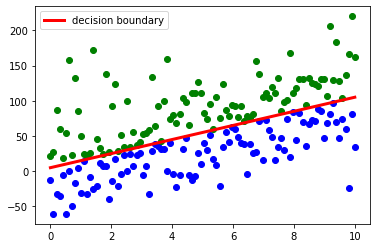

In [8]:

import random
def y(x, m, b):
  return m*x + b

import numpy as np
X = np.linspace(0, 10, 100)
y_above = [y(x, 10, 5) + abs(random.gauss(20,40)) for x in X]
y_below = [y(x, 10, 5) - abs(random.gauss(20,40)) for x in X]
import matplotlib.pyplot as plt
plt.scatter(X, y_below, c='b')
plt.scatter(X, y_above, c='g')
plt.plot(X, y(X, 10, 5),linestyle='solid', c='r', linewidth=3, label='decision boundary')
plt.legend()
plt.show()

In [9]:
np.random.randn(100)

array([ 0.27784238, -0.81057064,  0.1239279 ,  0.32774544,  1.1661262 ,
       -0.20363117,  1.34564465,  1.41617749, -1.28813349,  0.20238633,
       -0.27365062, -1.37096605,  0.77779006,  1.04703944, -1.60052351,
        1.62868835,  0.41486247,  0.12860907, -0.00324032, -0.7271073 ,
       -0.5657022 ,  0.02706059,  0.78776017, -1.15035387,  0.03982885,
        2.76259516,  1.56889923,  0.35974337,  0.25016855,  0.48745086,
       -0.64142002, -0.45096796,  0.71555904,  1.36322786,  1.72174899,
       -2.47072282,  1.58756259,  0.14592682,  0.97664132,  0.22660569,
       -0.61300004,  0.36435174,  0.82108944, -0.13284844, -0.17150644,
        0.58146986,  0.23015756,  1.51288869, -0.44163037, -1.45566889,
       -0.7362457 ,  0.32489053,  1.30901274, -0.92084054, -0.03173799,
       -0.58420821, -1.42043965, -0.5714534 ,  0.76962757,  0.86344011,
        0.51901527, -0.1400975 , -0.00891751,  1.14917453,  0.29542913,
       -0.45463138, -0.061352  ,  0.60518225, -0.24132103,  0.69

Now we can create the Perceptron Class

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score

class Perceptron(object):

    def __init__(self, dim_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        #self.weights = np.zeros(dim_inputs + 1) # plus 1 for bias
        self.weights = np.random.randn(dim_inputs + 1) # plus 1 for bias
           
    def predict_batch(self, inputs):
        res_vector = np.dot(inputs, self.weights[1:]) + self.weights[0]
        activations = [elem if elem > 0 else 0 for elem in res_vector] #1

        '''activations = []
        for elem in res_vector:
          if elem > 0:
            activations.append(1)
          else:
            activations.append(0)
            '''

        return np.array(activations)

    def predict(self, inputs):
        res = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # self.weights[0] is the bias
        if res > 0:
          activation = res #1
        else:
          activation = 0          
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
               
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs # update weights
                self.weights[0] += self.learning_rate * (label - prediction) # update bias

We create the input data:

$x_1$ and $x_2$

whereas we generate two categories using the rule:
1. One category above the line $x_2 = 10x_1 + 5$, and we label ist with 1
2. Second - below this line and label it with 0

The result is the following two-dimensional function:

$ f(x_1, x_2) = x_1 w_1 + x_2 w_2 + bias$

Our Perceptron will compute two weights and the bias term.

In [11]:
Nsamples = 10_000
x_1 = np.linspace(0, 10, Nsamples)

x_2 = np.array([y(elem, 10, 5) + abs(random.gauss(20,40)) for elem in x_1])
class_ones = np.column_stack((x_1, x_2))

x_2 = np.array([y(elem, 10, 5) - abs(random.gauss(20,40)) for elem in x_1])
class_zeros = np.column_stack((x_1, x_2))

training_inputs = np.vstack((class_ones, class_zeros))

print(training_inputs.shape)

labels = np.hstack((np.ones(Nsamples), np.zeros(Nsamples))).T
labels.shape

(20000, 2)


(20000,)

In [12]:
# create a Dense net with 3 hidden layers
# we add the ReLU activations as well
import tensorflow as tf
# we will use the Keras functional API for that
input_layer = tf.keras.Input(shape=(2), name="input")
h1 = tf.keras.layers.Dense(64, name="h1", activation="relu")(input_layer)
h2 = tf.keras.layers.Dense(128, name="h2", activation="relu")(h1)
h3 = tf.keras.layers.Dense(128, name="h3", activation="relu")(h2)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(h3)

# now we can create the model and print the summary
model = tf.keras.Model(input_layer, output_layer)
# we use BinaryCrossentropy as loss function
model.compile(optimizer='adam',   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics="accuracy")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
h1 (Dense)                   (None, 64)                192       
_________________________________________________________________
h2 (Dense)                   (None, 128)               8320      
_________________________________________________________________
h3 (Dense)                   (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(training_inputs, labels, epochs=10)

Epoch 1/10


C:\Python39\lib\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


625/625 [==============================] - 6s 6ms/step - loss: 0.1077 - accuracy: 0.9588

In [14]:
model.predict(class_ones)

array([[1.        ],
       [0.99999255],
       [0.9947338 ],
       ...,
       [1.        ],
       [1.        ],
       [0.9193493 ]], dtype=float32)

In [15]:
model.predict(class_zeros)

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [1.2758374e-04],
       [2.2264704e-25],
       [1.0870020e-06]], dtype=float32)

In [ ]:
# Training
perceptron = Perceptron(2, epochs=100)
perceptron.train(training_inputs, labels)

In [ ]:
# Inference
perceptron.predict_batch(class_ones)

In [ ]:
perceptron.predict_batch(class_ones)

In [ ]:
# weights
perceptron.weights[1:]

In [ ]:
perceptron.weights

In [ ]:
# bias
perceptron.weights[0]

##### Decision Boundary

Since we have determined the weights and bias, we can now compute the line, which has separated two categrogies as we have created them. This line - decision boundary - we develop from our classification function, which weights and bias where approximated by Perceptron algorithm:

$f(x_1, x_2)= x_1 \cdot w_1 + x_2 \cdot w_2 + b$

Since we consider $x_1$ to be the $x$ and $x_2$ to be the $y$, we can rewrite it:

$x \cdot w_1 + y \cdot w_2 + b$

**First Point y==0, x-intercept:**

$x = {\cfrac{-(b - w_2y)} {w_1}}\\
if \space y == 0 \Rightarrow
x = {\cfrac{-(b - w_20)}{w_1}} \Rightarrow
x = {\cfrac {-b} {w_1}}$

**Second Point x==0, y-intercept:**

$y = {\cfrac {-(b - w_1x)}{w_2}}\\
if \space x == 0 \Rightarrow
y = {\cfrac {-(b - w_10)}{w_2}} \Rightarrow
y = \cfrac {-b}{w_2}$

**Slope:**

$point_1 = (0, \cfrac {-b} {w_2}) \\
point_2 = (\cfrac {-b} {w_1}, 0)\\
m = \cfrac {(y_2 - y_1)}{(x_2 - x_1)}\Rightarrow
m = 0 - \Biggl(\cfrac {-\cfrac{b} {w_2}}{-\cfrac {b}{w_1}- 0} \Biggr)\Rightarrow
m = \cfrac{-\cfrac{b}{ w_2} }{\cfrac{b}{ w_1}}$

**y-intercept:** 

$y_{intercept} = \cfrac{-b }{w_2}$

**Complete formula:**

$\mathbf {y = \cfrac{-\cfrac{b}{ w_2} }{\cfrac{b}{ w_1}}x + \Biggl(\cfrac{-b }{w_2}\Biggl)}$


In [ ]:
b = perceptron.weights[0]
w_1 = perceptron.weights[1]
w_2 = perceptron.weights[2]

In [ ]:
y_hat = (-(b/w_2)/(b/w_1))* X + (-b/w_2)

In [ ]:
import random
def y(x, m, b):
  return m*x + b

import numpy as np
X = np.linspace(0, 10, 100)
y_above = [y(x, 10, 5) + abs(random.gauss(20,40)) for x in X]
y_below = [y(x, 10, 5) - abs(random.gauss(20,40)) for x in X]
plt.scatter(X, y_below, c='b')
plt.scatter(X, y_above, c='g')
plt.plot(X, y(X, 10, 5),linestyle='solid', c='yellow', linewidth=5, label='original decision boundary')
plt.plot(X, y_hat, c='red', linewidth=1, ls = '-.', label='perceptron decision boundary')
plt.legend()
plt.show();

As we see, we have achieved **exact fit**!

##### Visualization of the Perceptron training

https://owenshen24.github.io/perceptron/

##### Wait, we have seen this thing already! But what was it?

Of course, it resembles **ReLU** activation function applied on linear unit $w \cdot x + b$

$\displaystyle f(\mathbf {x})={\begin{cases}\mathbf{w} \cdot \mathbf {x} +b&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}$

The difference is that the ReLU preserves the positive output of $w \cdot x + b$ and the Perceptron sets it to 1.

The ReLU is more universal. It can be used for regression cases as well.

As we see the perceptron has already a build-in activation function. We will discuss activation functions and their different flavors in the next chapters in detail. 

But the idea of perceptron is the foundation of entire AI.

#### The biological neuron as inspiration for perceptron and entire AI 

#### From Perceptron to Dense Network

The idea of Percepton was the foundation of modern AI and Dense Neural networks particulary.

Besides the genious idea, the Perceptron has a couple of shortcomings. 

Fistly, it can only output 1 or 0, so it can not be used for regression problems.

Secondly, it's weights update rule. As a Loss Function in original Perceptron definition we just use $y -\hat{y}$ which is the difference between the ground truth and predicted. But from Gradient Descent algorithm we know that we build partial derivatives of the Loss Function, which reflects the function's **slope**. The Gradient Descent seems to be more fine graned update algorithm. 

Out of these shortcomings the idea of Dense networks was developed.

What are the dense networks?

1. They consist of several layers.
2. Each of them can contain a set of Perceptrons.
3. We use the Gradient Descent instead of Perceptron update rule.
4. We are free to use any of available loss functions.

Therefore the Dense Nets are called **MLP - Multilayer Perceptron**. Another name for them is **FFD - Feed Forward Dense Network**.


#### Anatomy of MLP on a toy example

Let's construct as toy example of MLP.
We assume that our dataset consist of **3 features** and  **1 target** variable.

We construct the following simple Dense Net.
1. Number of Input neurons: 3 (because of 3 inputs)
2. First Hidden Layer: 4
3. Second Hidden Layer: 6
4. Output Layer: 1 (because of one output)

Now we can code it in Tensorflow and see what is inside.

In [ ]:
import tensorflow as tf
# we will use the Keras functional API for that
input_layer = tf.keras.Input(shape=(3), name="input")
h1 = tf.keras.layers.Dense(4, name="h1")(input_layer)
h2 = tf.keras.layers.Dense(6, name="h2")(h1)
output_layer = tf.keras.layers.Dense(1, name="output")(h2)

# now we can create the model and print the summary
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Let's now inspect the weights and bias for every layer of the model
Input Layer has no weights. It just serves as a data entrance of the model.

So the first layer where we get the weights and bias is the first hidden layer. The weights matrix is called **kernel**.

##### First Hidden Layer

In [ ]:
# First hidden layer
model.weights[0]

Now let's see the bias **vector**:

In [ ]:
model.weights[1]

Our observation:

1. Weights matrix with shape $(3, 4)$ was created and initialised with small random numbers
2. Bias vector of shape $(4,)$ was created and initialised with zeros.

The data $\mathrm{D}$ has the shape $(n, 3)$ with $n=$ number of samples.
Now we compute the dot-product of the input matrix and weights:

\begin{equation}
\underset{n\times 4}{\mathrm{O_1}} = \underset{n\times 3}{\mathrm{D_{input}}} \times 
\underset{3\times 4}{\mathrm{W_1}}
\end{equation}

The output of the first hidden layer $\mathrm{O_1}$ has the shape $(n, 4)$.

Then we can broadcast (add) the bias vector to every row (sample) of the output matrix. Depending on what backend technology is used, this operation can be done blazing fast, like broadcasting (here addition) in **Numpy** which is written in Fortran. The core dataflow execution engine of **TensorFlow** and most of its matrix operations (e.g., matmul) are in $C\texttt{++}$

Let's us now inspect the parameters of the second hidden layer.

##### Second Hidden Layer

In [ ]:
# Second hidden layer
model.weights[2]

In [ ]:
model.weights[3]

Our observation:

1. Weights matrix with shape $(4, 6)$ was created and initialised with small random numbers
2. Bias vector of shape $(6,)$ was created and initialised with zeros.

The data $\mathrm{O_1}$ has then shape $(n, 4)$ with $n=$ number of samples and $4=$ number of outputs of the first layer.
Now we compute the dot-product of $\mathrm{O_1}$ and the weights matrix (kernel) of the second layer:

\begin{equation}
\underset{n\times 6}{\mathrm{O_2}} =  \underset{n\times 4}{\mathrm{O_1}} \times 
\underset{4\times 6}{\mathrm{W_2}}
\end{equation}

The output of the second hidden layer $\mathrm{O_2}$ has the shape $(n, 6)$. The we add the bias term $\underset{1\times 6}{\mathrm{b_2}}$ to every row of $\mathrm{O_2}$.


##### Output

In [ ]:
model.weights[4]

In [ ]:
model.weights[5]

###### Homework

**Part 1**

Please, replace the placeholder $?$ with correct dimensions for $\mathrm{O_{output}}$:

\begin{equation}
\underset{n\times ?}{\mathrm{O_{output}}} =  \underset{?\times ?}{\mathrm{O_2}} \times 
\underset{?\times ?}{\mathrm{W_3}}
\end{equation}

To compute the output we must then add the bias term, which is in this case a single number (scalar) to every row of the output matrix (not included in this task).

**Part 2**

Compute the number of all parameters (hint: it should be 53)

##### Formal neuron connection scheme in Dense Nets

Here you can see how the neurons are connected in the fully connected (Dense) network:

http://alexlenail.me/NN-SVG/AlexNet.html

Well, this looks quite cool. But how these scheme is related to what we have done in the previous chapter - matrix multiplication?

We "connect" one layer to the next by multiplying its output with the weights matrix of the next layer. And we do it for the whole layer at ones and not neuron by neuron to make this operation as fast as possible.

Every neuron of the hidden layer $n$ is the result of the dot product of the outputs of the previous hidden layer $n-1$ and weights vector of the hidden layer $n$ with corresponding size. The $output\:size_{n-1}$ corresponds to the number of neurons of the of the previous hidden layer $n-1$:

\begin{equation}
\underset{sample\:length\times 1}{\mathrm{N_n}} =  \underset{sample\:length\times {output\:size_{n-1}}}{\mathrm{N_{n-1}}} \times 
\underset{outputsize_{n-1} \times {1}}{\mathrm{W_n}}
\end{equation}

For every neuron of the layer $n$ we have its own weights vector of size  $outputsize_{n-1}$, which corresponds to the output size (number of neurons) of the previous vector.

This weight multiplication is represented by arrows, connection pathways, on the diagram above.

The output of each neuron is a one dimensional vector of shape ($sample\:length$, ).

But again, we do it in two steps only: 

1. We compute the dot product for the entire layer and not neuron by neuron. 
2. We broadcast (add) the bias terms vector to every sample row of the dot product result.

### Why the Perceptron is not enough?

Even for classification tasks, the Perceptron will fail if the data is highly non linear. Here is the proof. Let us generate some data wich is twisted like a spiral. 
I'll take the example code from the following gist: https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5


In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)).astype(int), axis=1)
res_b = np.append(x_b, np.ones((N,1)).astype(int), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)


plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

In [ ]:
res

In [ ]:
import pandas as pd
pd.DataFrame(res, columns=['a', 'b', 'target']).head(5)

So, we have here two data types: **a** is organge, and **b** is blue, whereas orange denoted as zero, and blue - as one. Let's train the Perceptron on it.

#### Preceptron Training

In [ ]:
# Training
perceptron = Perceptron(2, epochs=100)
perceptron.train(training_inputs=res[:, 0:2], labels=res[:, 2:3])

In [ ]:
y = res[:, 2:3]
y_hat = perceptron.predict_batch(res[:, 0:2])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Accuracy:", accuracy_score(y, y_hat))
print("Recall:", recall_score(y, y_hat))
print("Precision:", precision_score(y, y_hat))

All scores are around 60%, which is almost a **random guess**.

#### MLP Training

In [ ]:
# first we scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
res[:, 0:2] = scaler.fit_transform(res[:, 0:2])

In [ ]:
np.min(res[:, 0:2]), np.max(res[:, 0:2])

In [ ]:
# create a Dense net with 3 hidden layers
# we add the ReLU activations as well
import tensorflow as tf
# we will use the Keras functional API for that
input_layer = tf.keras.Input(shape=(2), name="input")
h1 = tf.keras.layers.Dense(64, name="h1", activation="relu")(input_layer)
h2 = tf.keras.layers.Dense(128, name="h2", activation="relu")(h1)
h3 = tf.keras.layers.Dense(128, name="h3", activation="relu")(h2)
output_layer = tf.keras.layers.Dense(1, name="output")(h3)

# now we can create the model and print the summary
model = tf.keras.Model(input_layer, output_layer)
# we use BinaryCrossentropy as loss function
model.compile(optimizer='adam',   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics="accuracy")
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(res[:, 0:2], res[:, 2:3], test_size=0.33, random_state=42)

In [ ]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

We achieve almost **100% accuracy** with this Dense Network setup.
You may object that this is not a fair comparison. Our Perceptron has only one unit (neuron) with only two weights. Yes, this is true. But that is all about. The Dense Network is just a layered set of Perceptrons without their built-in ReLU-like activation. It can use any of available activations, although specially the ReLU in the majority of cases seems to be the most efficient one. Therefore its second name - Multi Layer Perceptron.

With this layered design we can:

1. Encrease the number of weights to extrapolate a complex underlying process
2. Feed forward the output of one layer to the next

With this feedforward technique we train the layer on the output of the previous one. It can be compared to many sensorical processes in our body, where the complex raw signal is subsequentually broken down in to sets of more "digestable" signals.


#### Tensorflow Playground for the Dense Networks

With this playground from TensorFlow you try various network settings and observe in real time the inpact.



In [ ]:
%%html
<iframe src="https://playground.tensorflow.org" width="1200" height="1000"></iframe>